<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Classification/blob/main/k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
URL = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/breast-cancer.csv"
df = pd.read_csv(URL)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df['diagnosis'].value_counts() # not equal , should remove or add extra

,count
diagnosis,
B,357
M,212


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() # transformer

df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'].values) # for multiclasses
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,1,25.22,24.91,171.50,1878.0,0.10630,0.2665,0.33390,0.18450,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.28670,0.2355,0.10510
18,849014,1,19.81,22.15,130.00,1260.0,0.09831,0.1027,0.14790,0.09498,...,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.5372,0.23880,0.2768,0.07615
440,909411,0,10.97,17.20,71.73,371.5,0.08915,0.1113,0.09457,0.03613,...,12.36,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532
448,911150,0,14.53,19.34,94.25,659.7,0.08388,0.0780,0.08817,0.02925,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463
506,91544001,0,12.22,20.04,79.47,453.1,0.10960,0.1152,0.08175,0.02166,...,13.16,24.17,85.13,515.3,0.1402,0.2315,0.3535,0.08088,0.2709,0.08839


In [5]:
# df['diagnosis'] = df['diagnosis'].replace({"M" : 1, "B" : 0}) # this is used when classes are only two or binary
# df.head()

In [6]:
df = df.drop('id', axis = 1)

In [7]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap = "coolwarm")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [8]:
df.corrwith(df['diagnosis'], numeric_only=True).abs().sort_values(ascending=False).head(20)

,0
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


**ML preparation**

In [9]:
X = df.drop('diagnosis', axis = 1).values
Y = df['diagnosis']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

**ML**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [14]:
Y_predict = knn.predict(X_test)

**Baholash**

Jaccard Score

In [15]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, Y_predict)

np.float64(0.8958333333333334)

Confusion Matrix

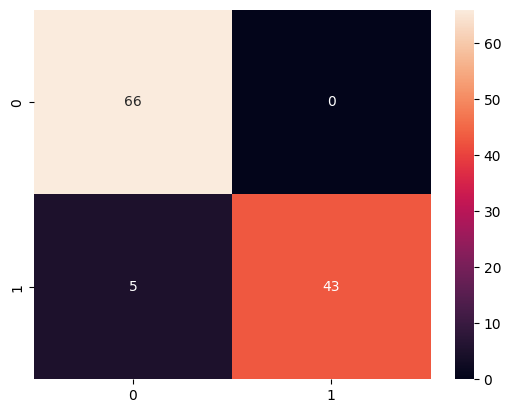

In [17]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(Y_test, Y_predict), annot=True)
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuraccy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
print(f'Accuraccy score : {accuraccy}\nPrecision : {precision}\nRecall : {recall}\nF1 score : {f1}')

Accuraccy score : 0.956140350877193
Precision : 1.0
Recall : 0.8958333333333334
F1 score : 0.945054945054945


In [21]:
from sklearn.metrics import classification_report
scores = classification_report(Y_test, Y_predict)
print(scores)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#Cross Validation

In [22]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn, X=X, y=Y, cv=5)

In [23]:
from sklearn.metrics import classification_report
scores = classification_report(Y, predict)
print(scores)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



#Finding the best K

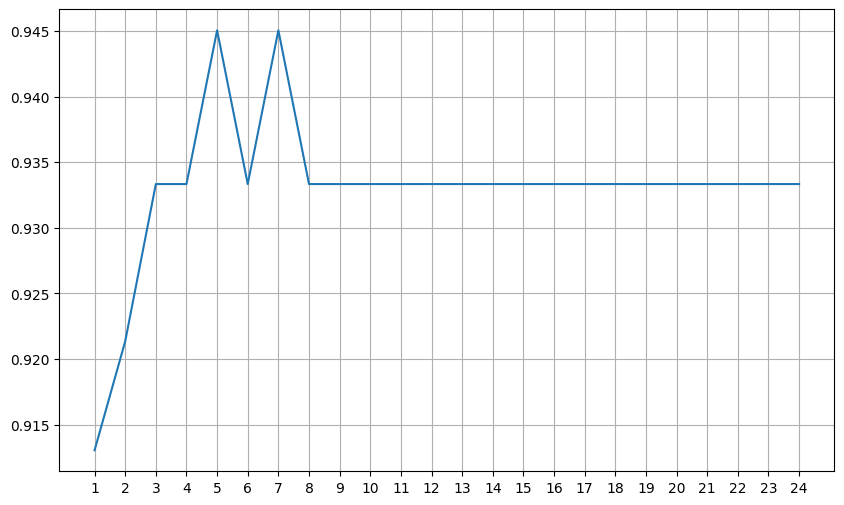

In [25]:
f1 = []

for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_predict = knn.predict(X_test)
    f1.append(f1_score(Y_test, Y_predict))

plt.figure(figsize = (10, 6))
x = [i for i in range(1,25)]
plt.plot(x,f1)
plt.xticks(x)
plt.grid()
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors" : np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [30]:
knn_gscv.cv_results_['rank_test_score']

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16], dtype=int32)

In [32]:
knn_gscv.best_params_

{'n_neighbors': np.int64(9)}

In [33]:
knn_gscv.best_score_

np.float64(0.968390001552554)

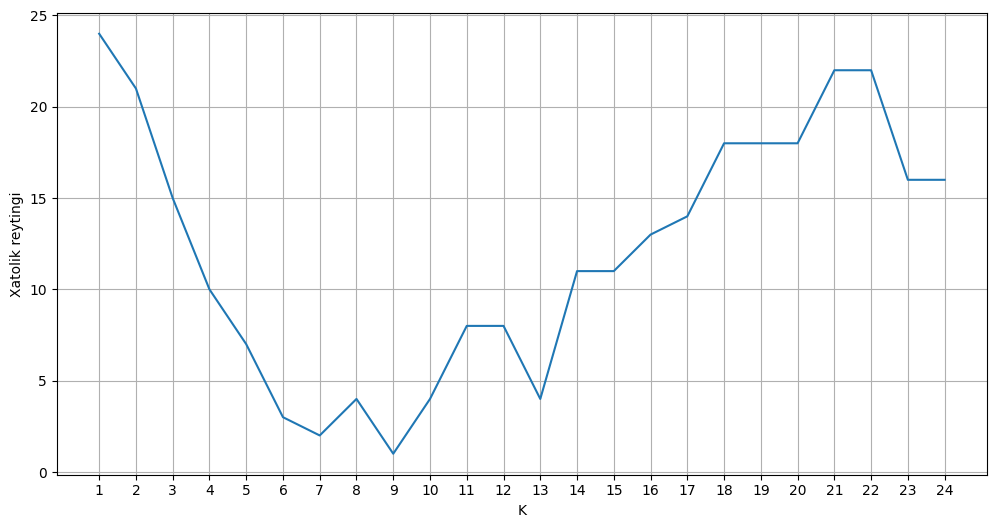

In [40]:
plt.figure(figsize = (12, 6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("K")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()